## Covid data analysis using Logistic Regression

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import FeatureImportances
import seaborn as sns

In [3]:
from mindsdb_native import MySqlDS

C:\Users\Simran\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


S3 Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Microsoft SQL Server Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Athena Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Google Cloud Storage Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]


pip3 install mindsdb_native --upgrade



In [4]:
# mysql data source
mysql_ds = MySqlDS(query="SELECT * FROM covid_flu_data", user="root", password="pass", database="world", port=3306)

In [5]:
#separating data from target
covid_data=mysql_ds[mysql_ds.columns[:20]]
covid_target=mysql_ds[mysql_ds.columns[20]]

In [6]:
#displays the first 5 rows
covid_data.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1


In [7]:
#displays n random rows
covid_target.sample(n=5)

20482    FLU
41460    FLU
42984    FLU
20258    FLU
29117    FLU
Name: DIAGNOSE, dtype: object

In [8]:
# splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(covid_data,covid_target,test_size=0.1)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)

In [10]:
#fitting the model
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [11]:
#calculates the prediction score of the model
model.score(x_test,y_test)

0.9295996401259559

In [12]:
#storing the predicted result for future use
y_pred=model.predict(x_test)
y_pred

array(['COVID', 'FLU', 'FLU', ..., 'COVID', 'ALLERGY', 'FLU'],
      dtype=object)

In [13]:
# returns Probability estimates.
model.predict_proba(x_test)

array([[2.73525502e-12, 4.09474164e-11, 5.06805135e-01, 4.93194865e-01],
       [2.51045298e-14, 2.51187143e-13, 7.20864597e-06, 9.99992791e-01],
       [3.08028808e-07, 6.52375811e-08, 2.10652699e-08, 9.99999606e-01],
       ...,
       [8.83514989e-08, 1.67049753e-08, 5.11492005e-01, 4.88507890e-01],
       [9.99963199e-01, 1.60643782e-05, 1.25408912e-09, 2.07358016e-05],
       [8.46538335e-05, 3.14292647e-05, 4.13438424e-03, 9.95749533e-01]])

In [58]:
#The 4 different classes in this dataset
classes=y_test.unique()
classes

array(['FLU', 'ALLERGY', 'COVID', 'COLD'], dtype=object)

In [15]:
# To evaluate the performance of a classification model
cm=confusion_matrix(y_test,y_pred)
cm

array([[1622,   18,    0,    6],
       [  31,   57,    2,    7],
       [   2,    2,  121,   67],
       [  10,   24,  144, 2333]], dtype=int64)

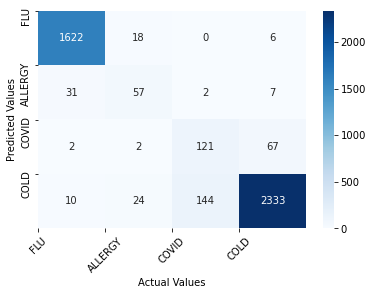

In [39]:
#visualising confusion matrix
sns.heatmap(cm, annot=True,fmt='g',cmap='Blues')
width = np.arange(len(classes))
plt.xticks(width, classes, rotation=45)
plt.yticks(width, classes)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Logistic Regression Feature Importance

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E2A883670>,
                   estimator=LogisticRegression(solver='liblinear'),
                   relative=False, stack=True)

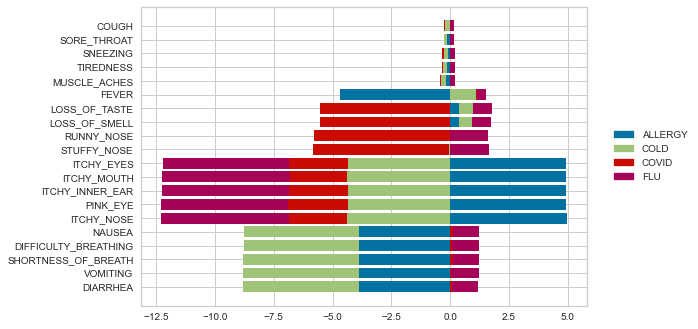

In [57]:
#The interpretation of the importance of coeficients depends on the model
viz = FeatureImportances(model, stack=True, relative=False)
viz.fit(x_train,y_train)